# Problem Set - Week 6
## Guillermo Trefogli

## Part 1. EDA

## A

In [1]:
! pip install sktime

You should consider upgrading via the 'C:\Users\guill\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
! pip install pmdarima

You should consider upgrading via the 'C:\Users\guill\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
from sktime.forecasting.all import temporal_train_test_split
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError, MeanAbsoluteError, MeanSquaredError
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [4]:
df = pd.read_csv("hw6_data_var.csv", parse_dates=["Unnamed: 0"]).rename(columns={"Unnamed: 0":"ds"})
df.set_index('ds', inplace=True)
df

,PCE,AHE,PCEPI
ds,,,
2006-03-01,9122.1,20.04,88.473
2006-04-01,9174.8,20.17,88.850
2006-05-01,9215.1,20.13,89.070
2006-06-01,9240.8,20.22,89.285
2006-07-01,9322.6,20.30,89.601
...,...,...,...
2019-08-01,14650.9,28.16,110.115
2019-09-01,14673.2,28.15,110.167
2019-10-01,14728.5,28.24,110.377


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PCE,166.0,11507.872289,1630.579647,9122.100,10009.0000,11204.100,12789.90000,14796.30
AHE,166.0,23.938193,2.235573,20.040,22.2375,23.765,25.67500,28.36
PCEPI,166.0,100.006169,6.028324,88.473,95.1450,100.861,104.18625,110.75


In [6]:
df.isnull().sum()

PCE      0
AHE      0
PCEPI    0
dtype: int64

In [7]:
print('Start date:', df.index.min())
print('End date:', df.index.max())
df.agg(
    {
        "PCE": ["min", "max", "median", "mean", "std"],
        "AHE": ["min", "max", "median", "mean", "std"],
        "PCEPI": ["min", "max", "median", "mean", "std"],
    }
)

Start date: 2006-03-01 00:00:00
End date: 2019-12-01 00:00:00


,PCE,AHE,PCEPI
min,9122.100000,20.040000,88.473000
max,14796.300000,28.360000,110.750000
median,11204.100000,23.765000,100.861000
mean,11507.872289,23.938193,100.006169
std,1630.579647,2.235573,6.028324


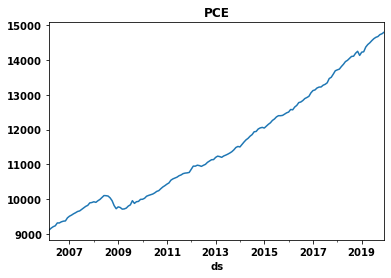

In [8]:
df['PCE'].dropna().plot()
plt.title('PCE')
plt.show()

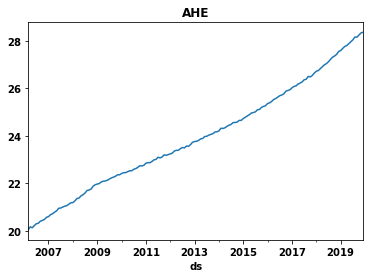

In [9]:
df['AHE'].plot()
plt.title('AHE')
plt.show()

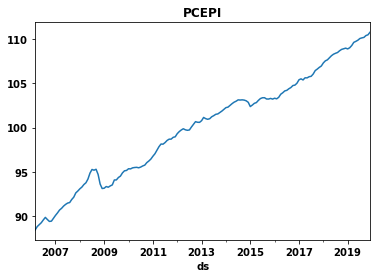

In [10]:
df['PCEPI'].plot()
plt.title('PCEPI')
plt.show()

In [11]:
df.corr()

,PCE,AHE,PCEPI
PCE,1.000000,0.988292,0.973768
AHE,0.988292,1.000000,0.988329
PCEPI,0.973768,0.988329,1.000000


In [12]:
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from copy import deepcopy

def adf_test(timeseries):
    print ('Dickey-Fuller Test Result:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#define KPSS
def kpss_test(timeseries, trend='c'):
    print ('KPSS Test Result:')
    kpsstest = kpss(timeseries, regression=trend)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [13]:
adf_test(df['PCE'])

Dickey-Fuller Test Result:
Test Statistic                   2.189889
p-value                          0.998874
#Lags Used                       2.000000
Number of Observations Used    163.000000
Critical Value (1%)             -3.471119
Critical Value (5%)             -2.879441
Critical Value (10%)            -2.576314
dtype: float64


In [14]:
adf_test(df['PCEPI'])

Dickey-Fuller Test Result:
Test Statistic                  -0.434152
p-value                          0.904239
#Lags Used                       1.000000
Number of Observations Used    164.000000
Critical Value (1%)             -3.470866
Critical Value (5%)             -2.879330
Critical Value (10%)            -2.576255
dtype: float64


In [15]:
adf_test(df['AHE'])

Dickey-Fuller Test Result:
Test Statistic                   1.680032
p-value                          0.998079
#Lags Used                       9.000000
Number of Observations Used    156.000000
Critical Value (1%)             -3.472979
Critical Value (5%)             -2.880252
Critical Value (10%)            -2.576747
dtype: float64


In [16]:
kpss_test(df['PCE'])

KPSS Test Result:
Test Statistic            1.190019
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\guill\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [17]:
kpss_test(df['AHE'])

KPSS Test Result:
Test Statistic            1.207634
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\guill\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [18]:
kpss_test(df['PCEPI'])

KPSS Test Result:
Test Statistic            1.206769
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\guill\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### B. 

- The dataset contains three variables:
    - PCE: Personal consumptions expenditures is the primary measure of consumer spending on goods and services in the US economy. This accounts for 2/3 of domestic spending and this is the primary engine that drives future economic growth https://www.bea.gov/resources/methodologies/nipa-handbook/pdf/chapter-05.pdf (Links to an external site.)
    - AHE: Average hourly earnings is reported in dollars per hour and is reported monthly
    - PCEPI: Personal consumptions expenditures price index is a measure of the average increase in prices for all domestic personal consumption. A major inflationary measure in the United States

- There are no missing values in the dataset.

- Correlation is present in the relationship between the three variables (higher than 0.97 in all cases).

- The three variables are similar in terms of time series pattern: increasing trend over time.

- ADF and KPSS test show that the time series is stationary for the three variables:
        
    - **ADF test** is showing, for the three of them, that **non-stationarity cannot be rejected**. The p-value in the test is greater than 0.05 for the three of them, which means that the null hypothesis of non-stationarity cannot be rejected.
    - **KPSS test** is showing that **stationarity in the time series can be rejected**. The p-value is smaller than 0.05, which means that the null hypothesis of stationarity in the time series can be rejected.

## Part 2 – Granger Causality

### A. 

The EDA shows that these two variables are strongly correlated, which intuitively make sense. We don't know the direction of the causal relationship between them, but it is expected that higher the average hourly earnings that greater the personal consumption expenditures and the other way around.

### B. 

In [19]:
df['PCE_diff'] = df['PCE'].diff()
df['AHE_diff'] = df['AHE'].diff()
df['PCEPI_diff'] = df['PCEPI'].diff()

### C. 

In [20]:
data = df[['PCE_diff', 'AHE_diff']].dropna()
data

,PCE_diff,AHE_diff
ds,,
2006-04-01,52.7,0.13
2006-05-01,40.3,-0.04
2006-06-01,25.7,0.09
2006-07-01,81.8,0.08
2006-08-01,-0.8,0.02
...,...,...
2019-08-01,39.0,0.12
2019-09-01,22.3,-0.01
2019-10-01,55.3,0.09


In [21]:
alpha=0.05

In [22]:
from statsmodels.tsa.stattools import grangercausalitytests, q_stat
granger_results = grangercausalitytests(data, maxlag=10, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0285  , p=0.8662  , df_denom=161, df_num=1
ssr based chi2 test:   chi2=0.0290  , p=0.8648  , df=1
likelihood ratio test: chi2=0.0290  , p=0.8648  , df=1
parameter F test:         F=0.0285  , p=0.8662  , df_denom=161, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1227  , p=0.8846  , df_denom=158, df_num=2
ssr based chi2 test:   chi2=0.2531  , p=0.8811  , df=2
likelihood ratio test: chi2=0.2529  , p=0.8812  , df=2
parameter F test:         F=0.1227  , p=0.8846  , df_denom=158, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1740  , p=0.9138  , df_denom=155, df_num=3
ssr based chi2 test:   chi2=0.5457  , p=0.9087  , df=3
likelihood ratio test: chi2=0.5448  , p=0.9089  , df=3
parameter F test:         F=0.1740  , p=0.9138  , df_denom=155, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5205  , p=0.7208  

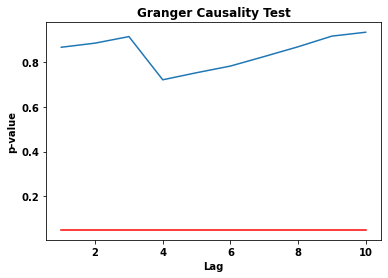

In [23]:
res_list = []
for lag, v in granger_results.items():
    res = {}
    res['Lag'] = lag
    for test, stats in v[0].items():
        res[test] = stats[1]

    res_list.append(res)

pvals = pd.DataFrame(res_list)
pvals.set_index('Lag', inplace=True)
pvals_graph = pvals['params_ftest']

pvals_graph.plot(title='Granger Causality Test')
alpha_ser = pd.Series([alpha]*len(pvals_graph), index=pvals_graph.index)
alpha_ser.plot(color='red')
plt.ylabel('p-value')
plt.show()

### D. 

In [24]:
data = df[['AHE_diff', 'PCE_diff']].dropna()
data

,AHE_diff,PCE_diff
ds,,
2006-04-01,0.13,52.7
2006-05-01,-0.04,40.3
2006-06-01,0.09,25.7
2006-07-01,0.08,81.8
2006-08-01,0.02,-0.8
...,...,...
2019-08-01,0.12,39.0
2019-09-01,-0.01,22.3
2019-10-01,0.09,55.3


In [25]:
granger_results = grangercausalitytests(data, maxlag=10, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0186  , p=0.8917  , df_denom=161, df_num=1
ssr based chi2 test:   chi2=0.0189  , p=0.8906  , df=1
likelihood ratio test: chi2=0.0189  , p=0.8906  , df=1
parameter F test:         F=0.0186  , p=0.8917  , df_denom=161, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1373  , p=0.3233  , df_denom=158, df_num=2
ssr based chi2 test:   chi2=2.3466  , p=0.3094  , df=2
likelihood ratio test: chi2=2.3298  , p=0.3119  , df=2
parameter F test:         F=1.1373  , p=0.3233  , df_denom=158, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7396  , p=0.1612  , df_denom=155, df_num=3
ssr based chi2 test:   chi2=5.4546  , p=0.1414  , df=3
likelihood ratio test: chi2=5.3648  , p=0.1470  , df=3
parameter F test:         F=1.7396  , p=0.1612  , df_denom=155, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7223  , p=0.1479  

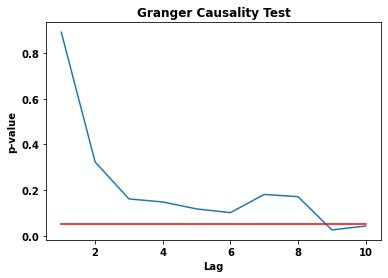

In [26]:
res_list = []
for lag, v in granger_results.items():
    res = {}
    res['Lag'] = lag
    for test, stats in v[0].items():
        res[test] = stats[1]

    res_list.append(res)

pvals = pd.DataFrame(res_list)
pvals.set_index('Lag', inplace=True)
pvals_graph = pvals['params_ftest']

pvals_graph.plot(title='Granger Causality Test')
alpha_ser = pd.Series([alpha]*len(pvals_graph), index=pvals_graph.index)
alpha_ser.plot(color='red')
plt.ylabel('p-value')
plt.show()

### E

- Interpretation for the null hypothesis of Granger Test:

    - The null hypothesis in the test is that the lagged values of "x" (the explanatory variable) do not explain the variation in "y" (the explained variable). 

    - First, where x = AHE and y = PCE, we are seeing that the pvalues are greater than 0.05 (until the 10th lag), which means that we cannot reject the null hypothesis of no causal relationship. 
    
    - Second, where x = PCE and y = AHE, we are seeing that the pvalues are decreasing with number of laggs until reaching a point in which it gets statistical significant (less than 0.05) by 9th lag, which means that we can reject the null hypothesis of no causal relationship. 

## Part 3 - VARMA modeling

### A. 

In [27]:
adf_test(df['PCE_diff'].dropna())

Dickey-Fuller Test Result:
Test Statistic                -6.605709e+00
p-value                        6.564988e-09
#Lags Used                     1.000000e+00
Number of Observations Used    1.630000e+02
Critical Value (1%)           -3.471119e+00
Critical Value (5%)           -2.879441e+00
Critical Value (10%)          -2.576314e+00
dtype: float64


In [28]:
adf_test(df['PCEPI_diff'].dropna())

Dickey-Fuller Test Result:
Test Statistic                -7.507425e+00
p-value                        4.099451e-11
#Lags Used                     0.000000e+00
Number of Observations Used    1.640000e+02
Critical Value (1%)           -3.470866e+00
Critical Value (5%)           -2.879330e+00
Critical Value (10%)          -2.576255e+00
dtype: float64


In [29]:
adf_test(df['AHE_diff'].dropna())

Dickey-Fuller Test Result:
Test Statistic                  -1.012276
p-value                          0.748761
#Lags Used                      14.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
Critical Value (5%)             -2.881009
Critical Value (10%)            -2.577151
dtype: float64


In [30]:
kpss_test(df['PCE_diff'].dropna())

KPSS Test Result:
Test Statistic            0.487339
p-value                   0.044518
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [31]:
kpss_test(df['AHE_diff'].dropna())

KPSS Test Result:
Test Statistic            0.456203
p-value                   0.052930
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [32]:
kpss_test(df['PCEPI_diff'].dropna())

KPSS Test Result:
Test Statistic            0.094052
p-value                   0.100000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\guill\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


### Adding differences to get AHE and  stationary

- Based on ADF, we need to differentiate for AHC
- Based on KPSS, we need to differentiate for AHC and PCE

In [33]:
df['AHE_diff2'] = df['AHE_diff'].diff().diff()

In [34]:
adf_test(df['AHE_diff2'].dropna())

Dickey-Fuller Test Result:
Test Statistic                -7.001846e+00
p-value                        7.287822e-10
#Lags Used                     1.400000e+01
Number of Observations Used    1.480000e+02
Critical Value (1%)           -3.475325e+00
Critical Value (5%)           -2.881275e+00
Critical Value (10%)          -2.577293e+00
dtype: float64


In [35]:
kpss_test(df['AHE_diff2'].dropna())

KPSS Test Result:
Test Statistic            0.189893
p-value                   0.100000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\guill\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [36]:
df['PCE_diff2'] = df['PCE_diff'].diff().diff()

In [37]:
adf_test(df['PCE_diff2'].dropna())

Dickey-Fuller Test Result:
Test Statistic                -7.301904e+00
p-value                        1.331855e-10
#Lags Used                     1.200000e+01
Number of Observations Used    1.500000e+02
Critical Value (1%)           -3.474715e+00
Critical Value (5%)           -2.881009e+00
Critical Value (10%)          -2.577151e+00
dtype: float64


In [38]:
kpss_test(df['PCE_diff2'].dropna())

KPSS Test Result:
Test Statistic            0.043249
p-value                   0.100000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\guill\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


We can identify then that the best order is order (p, q) is (3, 0) and it is for VAR model:

In [39]:
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [40]:
varma_df = df[['PCE','AHE', 'PCEPI']].dropna()
train = varma_df[:-13]
test = varma_df[-13:]
var_df = df[['PCE_diff2','AHE_diff2', 'PCEPI_diff']].dropna()
train_var = var_df[:-12]
test_var = var_df[-12:]
prange = range(0,4)
qrange = range(1,4)
max_aic = np.inf
best_order = None

print('Running search of VARMA')

for p in prange:
    for q in qrange:
        order = (p, q)
        varma_model = VARMAX(train, order=order).fit(disp=False)
        current_aic = varma_model.aic
        print('\t Order is', order, 'with AIC of', current_aic)
        if current_aic < max_aic:
            max_aic = current_aic 
            best_order = order

print('Best VARMA order is', best_order, 'with AIC of', max_aic)

max_aic_var = np.inf
best_order_var = None
print('Running search of VAR')
for p in prange:
    order = (p, 0)
    var_model = VAR(train).fit(p)
    current_aic = var_model.aic
    print('\t Order is', order, 'with AIC of', current_aic)
    if current_aic < max_aic_var:
        max_aic_var = current_aic 
        best_order_var = order

print('Best VAR order is', best_order_var, 'with AIC of', max_aic_var)

Running search of VARMA
	 Order is (0, 1) with AIC of 2979.350418228753
	 Order is (0, 2) with AIC of 2819.0934531058083
	 Order is (0, 3) with AIC of 2742.530256952685
	 Order is (1, 1) with AIC of 4134.1471965117835
	 Order is (1, 2) with AIC of 3299.7086685803542
	 Order is (1, 3) with AIC of 2957.048379272
	 Order is (2, 1) with AIC of 6651.8173717998125
	 Order is (2, 2) with AIC of 5300.240365204367
	 Order is (2, 3) with AIC of 5432.601010813803
	 Order is (3, 1) with AIC of 7410.405155283706
	 Order is (3, 2) with AIC of 3900.275660444901
	 Order is (3, 3) with AIC of 4071.669154725519
Best VARMA order is (0, 3) with AIC of 2742.530256952685
Running search of VAR
	 Order is (0, 0) with AIC of 12.243589209130015
	 Order is (1, 0) with AIC of -3.318112474025692
	 Order is (2, 0) with AIC of -3.8363653797902275
	 Order is (3, 0) with AIC of -3.958260862334076
Best VAR order is (3, 0) with AIC of -3.958260862334076


### B. 

In [41]:
var_model = VAR(train_var).fit(3)
var_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 20, May, 2022
Time:                     20:47:21
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -1.41681
Nobs:                     148.000    HQIC:                  -1.77751
Log likelihood:          -450.207    FPE:                   0.132161
AIC:                     -2.02435    Det(Omega_mle):        0.108622
--------------------------------------------------------------------
Results for equation PCE_diff2
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                14.465303         4.946489            2.924           0.003
L1.PCE_diff2         -1.270115         0.083301          -15.247           0.000
L1.AHE_diff2        -66.941721        80.310653         

### C. 

We are expecting the errors in the matrix to be 1 in the diagonal and 0 in the rest of the matrix, which means perfect correlation within the same variables - same series - but not with other variables. However, what we are observing in the matrix is that perfect correlation holds but not the second part: even when lower, there exist correlation across series, which is slighty greater between PCE and PCEPI. 

After testing for the statistical significance of residuals correlation, we found that we reject the null hypothesis of no correlation (the p-value of the test is smaller than 0.05 for a null hypothesis of no correlation).

In [42]:
var_model.test_whiteness(signif =0.05).summary()

Test statistic,Critical value,p-value,df
130.0,82.53,0.000,63


### D 

In [43]:
yhat = var_model.forecast(var_model.endog, steps=12)
idx=test_var.index
df_preds = pd.DataFrame(yhat).set_index(idx)
df_preds.rename(columns={0: 'PCE_forecast', 1: 'AHE_forecast', 2: 'PCEPI_forecast'}, inplace=True)

#### True values vs Forecast for PCE

<AxesSubplot:xlabel='ds'>

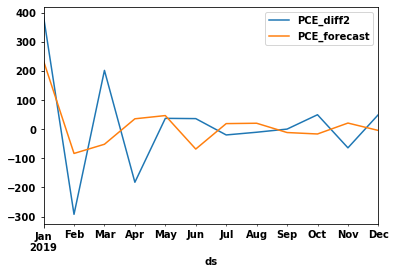

In [44]:
df_results = pd.concat([test_var, df_preds], axis=1)
df_results[['PCE_diff2', 'PCE_forecast']].plot()

#### True values vs Forecast for AHE

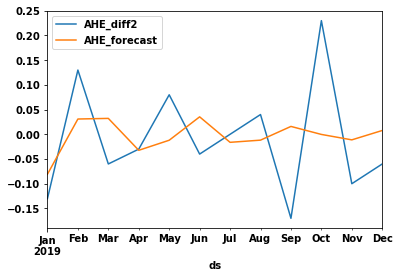

In [45]:
df_results[['AHE_diff2', 'AHE_forecast']].plot()
plt.show()

#### True values vs Forecast for PCEPI

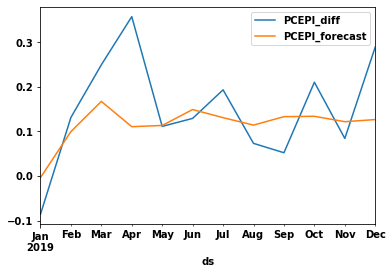

In [46]:
df_results[['PCEPI_diff', 'PCEPI_forecast']].plot()
plt.show()

#### Getting cumulative sums: 

In [47]:
df_preds.rename(columns={'PCE_forecast':'PCE', 
                         'AHE_forecast': 'AHE',
                         'PCEPI_forecast': 'PCEPI'}, inplace=True)

forecast_results1 = pd.concat([df[-13:-12][['PCE', 'PCEPI']], df_preds[['PCE', 'PCEPI']]], axis=0).reset_index(drop=True)\
                    .cumsum()\
                    .drop([0])\
                    .set_index(idx)

forecast_results1.columns = ['PCE_forecast', 'PCEPI_forecast']

#### True values vs Forecast for PCE:

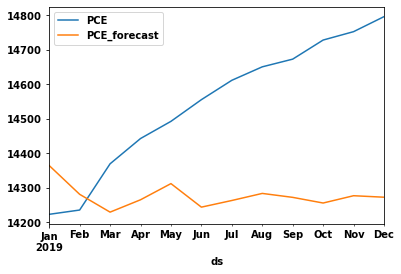

In [48]:
forecast_pce = pd.concat([df[-12:]['PCE'],forecast_results1[['PCE_forecast']]], axis=1)
forecast_pce.plot()
plt.show()

#### RMSE for PCE:

In [49]:
str(sqrt(mean_squared_error(df[-12:]['PCE'],forecast_results1['PCE_forecast'])))

'334.26314689466614'

#### True values vs Forecast for PCEPI:

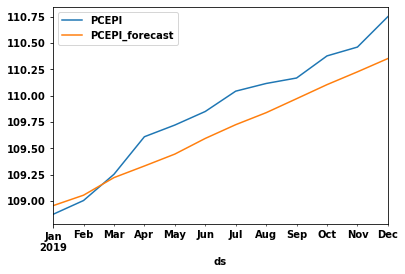

In [50]:
forecast_pcepi = pd.concat([df[-12:]['PCEPI'],forecast_results1[['PCEPI_forecast']]], axis=1)
forecast_pcepi.plot()
plt.show()

#### RMSE for PCEPI:

In [52]:
str(sqrt(mean_squared_error(df[-12:]['PCEPI'],forecast_results1['PCEPI_forecast'])))

'0.24742881664174932'

#### True values vs Forecast for AHE:

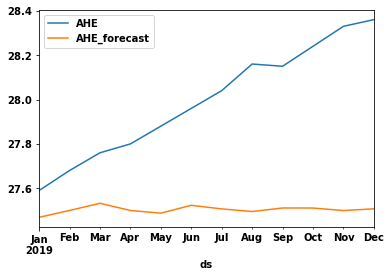

In [54]:
# AHE second difference - double cumsum
forecast_results2 = pd.concat([df[-13:-12][['AHE']],df_preds[['AHE']]], axis=0).reset_index(drop=True)\
                    .cumsum()\
                    .drop([0])\
                    .set_index(idx)

forecast_results2.columns=['AHE_forecast']

forecast_ahe = pd.concat([df[-12:]['AHE'],forecast_results2[['AHE_forecast']]], axis=1)
forecast_ahe.plot()
plt.show()

#### RMSE for AHE:

In [55]:
str(sqrt(mean_squared_error(df[-12:]['AHE'],forecast_results2['AHE_forecast'])))

'0.5487657637033092'

### E. 
The advantage of the VAR model is that we can estimate the series simultanously in comparison to the procedure we follow by applying ARIMA or Prophet models. Another difference is that we can add with VARMA lags for regressor while in the case of ARIMA of Phophet models we can add exogenous regressors.